In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from PIL import ImageDraw
sys.path.append('..')
from utilitaire.imgAiTrainer.imgAiTrainer import Trainer

tr = Trainer()

In [2]:
def show_sample(img):
  figure, axis = plt.subplots(1,1)
  axis.imshow(img/255)

In [3]:
def show_sample2(img,img2):
  figure, (axis1, axis2) = plt.subplots(1,2)
  axis1.imshow(img/255)
  axis2.imshow(img2/255)

In [4]:
model = keras.models.load_model('save/model/model')
model.load_weights('save/poids/model')

In [5]:
cercleT = tr.createCercle((800,600),True)

img = Image.open("../../Assets/imgAiTrainer/Cercle.png")
img = img.resize((160, 120))
img = keras.preprocessing.image.img_to_array(img)
print(img[30][65])
show_sample(img)
imgIa = np.expand_dims(img, axis=0)
imgIa.shape

FileNotFoundError: [Errno 2] No such file or directory: '../../Assets/imgAiTrainer/screenshot088.jpg'

In [19]:
%%time
y_pred = model.predict(imgIa)

Wall time: 222 ms


In [20]:
print("Prédiction : ",y_pred)
print("Image : ",cercleT[0],cercleT[1],cercleT[2])

Prédiction :  [[387.9087   510.57477   39.489872  61.6388  ]]
Image :  (142.5, 407.5) 61.5 104.5


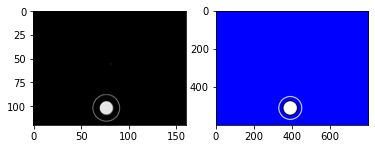

In [21]:
pred=y_pred[0]
imgIA = Image.new('RGBA', (800,600),"blue" )
draw = ImageDraw.Draw(imgIA)
draw.ellipse([round(pred[0]-pred[2]),round(pred[1]-pred[2]),round(pred[0]+pred[2]),round(pred[1]+pred[2])], fill = 'white', outline ='black', width=5)
draw.ellipse([round(pred[0]-pred[3]),round(pred[1]-pred[3]),round(pred[0]+pred[3]),round(pred[1]+pred[3])], fill = None, outline ='white', width=5)
imgPre = tf.keras.preprocessing.image.img_to_array(imgIA, data_format=None, dtype=None)
show_sample2(img,imgPre)